In [1]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load dataset
df = pd.read_csv("news_dataset.csv")

In [3]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [7]:
df["text"] = df["text"].apply(preprocess_text)

In [8]:
# Splitting dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["class"], test_size=0.2, random_state=42)

In [6]:
# Create a TF-IDF + Naïve Bayes pipeline
pipeline_fake_news = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [7]:
# Train the model
pipeline_fake_news.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [27]:
# Predictions
y_pred_fake_news = pipeline_fake_news.predict(X_test)

In [28]:
# Model evaluation
print("Fake News Detection Accuracy:", accuracy_score(y_test, y_pred_fake_news))
print(classification_report(y_test, y_pred_fake_news))

Fake News Detection Accuracy: 0.9390868596881959
              precision    recall  f1-score   support

       False       0.94      0.94      0.94      4650
        True       0.94      0.94      0.94      4330

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [29]:
# Test with a sample news article
sample_text = ["Breaking: Scientists discover a new element that defies physics!"]
print("Predicted Label (Fake/Real):", pipeline_fake_news.predict(sample_text)[0])

Predicted Label (Fake/Real): False


Logestic Regression

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
# Create a TF-IDF + Logistic Regression pipeline
pipeline_logreg = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=500, solver='liblinear'))

In [9]:
# Train the model
pipeline_logreg.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression',
                 LogisticRegression(max_iter=500, solver='liblinear'))])

In [10]:
# Predictions
y_pred_logreg = pipeline_logreg.predict(X_test)

In [11]:
# Model evaluation
print("Fake News Detection Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Fake News Detection Accuracy (Logistic Regression): 0.9874164810690423
              precision    recall  f1-score   support

       False       0.99      0.98      0.99      4650
        True       0.98      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [14]:
# Test with a sample news article
sample_text = ["Radiation Leak Detected Near Major City: Authorities Warn of Health Risks!"]
print("Predicted Label (Fake/Real):", pipeline_logreg.predict(sample_text)[0])

Predicted Label (Fake/Real): False


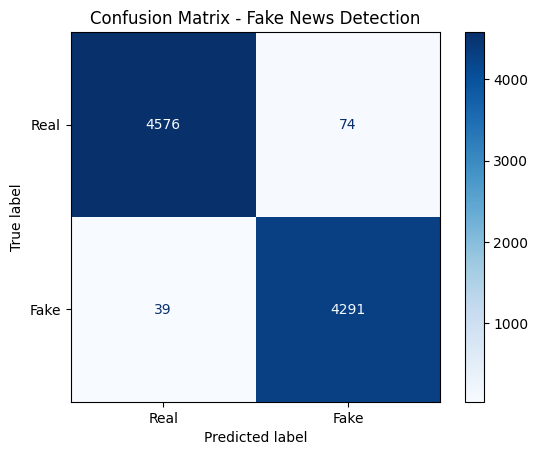

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Fake News Detection")
plt.show()


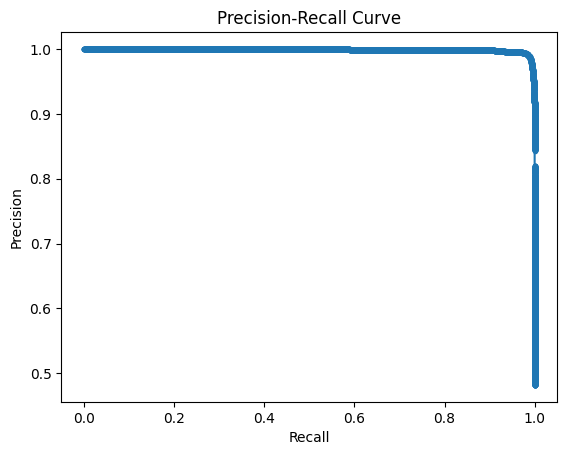

In [14]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, pipeline_logreg.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


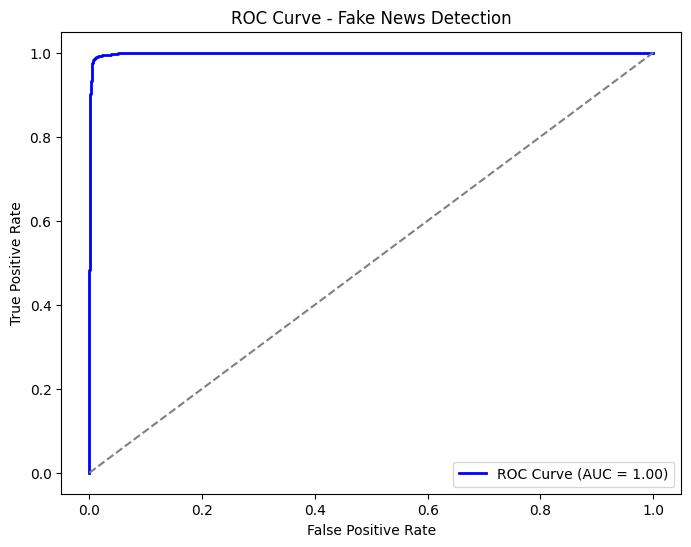

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities
y_prob = pipeline_logreg.predict_proba(X_test)[:, 1]  # Probability of class 'Fake'

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random Guess Line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Fake News Detection")
plt.legend(loc="lower right")
plt.show()


In [18]:
# Test with a sample news article
sample_text = ["Radiation Leak Detected Near Major City: Authorities Warn of Health Risks!"]
print("Predicted Label (Fake/Real):", pipeline_logreg.predict(sample_text)[0])

Predicted Label (Fake/Real): False


In [16]:
import joblib
joblib.dump(pipeline_logreg, "fake_news_model.pkl")

['fake_news_model.pkl']

Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [9]:
# Create a TF-IDF + Random Forest pipeline
pipeline_rf = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=200, random_state=42))

In [10]:
# Train the model
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [11]:
# Predictions
y_pred_rf = pipeline_rf.predict(X_test)

In [12]:
# Model evaluation
print("Fake News Detection Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Fake News Detection Accuracy (Random Forest): 0.9898663697104677
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      4650
        True       0.99      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

